<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harris corner detection

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

In this activity we will implement a Harris corner detection algorithm. Then, we will use the OpenCV Harris corner detection function.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display

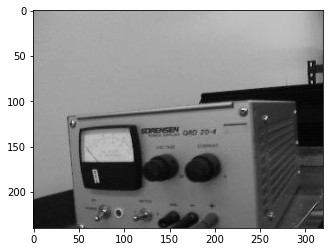

In [18]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/test000.jpg'

urllib.request.urlretrieve(IMAGE_URL, 'test000.jpg')

img = cv2.imread('test000.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(img_gray, cmap='gray')
plt.show()


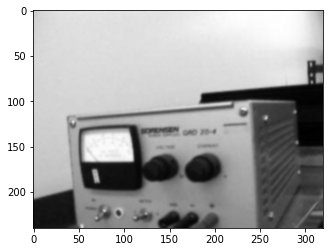

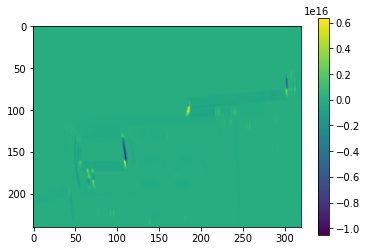

In [4]:
# Apply Gaussian blur


sigma = 1
img_blur = cv2.GaussianBlur(img_gray, (13,13), sigma)

plt.imshow(img_blur, cmap='gray')
plt.show()

# Compute the gradient components
Gx = cv2.Sobel(img_blur,cv2.CV_64F,1,0,ksize=5)
Gy = cv2.Sobel(img_blur,cv2.CV_64F,0,1,ksize=5)

# Compute the outer product g'g at each pixel
Gxx = Gx * Gx
Gxy = Gx * Gy
Gyy = Gy * Gy

# Size of neighborhood over which to compute corner features.
N = 13
 
w = np.ones(N)     # The neighborhood
 
# Sum the G's over the window size.
A11 = cv2.filter2D(Gxx, cv2.CV_64F, w)
A12 = cv2.filter2D(Gxy, cv2.CV_64F, w)
A22 = cv2.filter2D(Gyy, cv2.CV_64F, w)

# At each pixel (x,y), we have the 2x2 matrix
#  [A11(x,y) A12(x,y)
#   A21(x,y) A22(x,y)]
# Of course, A21 = A12.

# Compute the interest score: det(A) - alpha * trace(A)^2
alpha = 0.06
detA = A11 * A22 - A12**2 # Computes det(A) at each pixel
traceA = A11 + A22 # Computer trace(A) at each pixel 
s = detA - alpha * traceA**2 # The interest score


plt.imshow(s)
plt.colorbar()
plt.show()



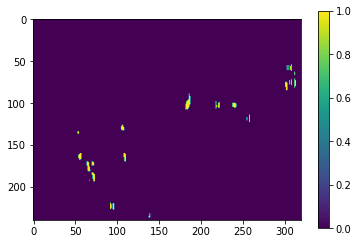

In [5]:
# Let's threshold the result

s_thresh = s > np.max(s) * 0.07

plt.imshow(s_thresh)
plt.colorbar()
plt.show()

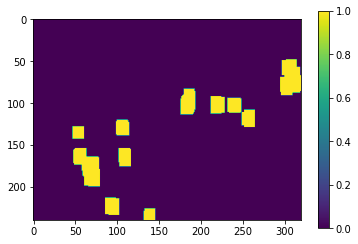

In [7]:
from scipy import ndimage as ndi
# Detect white blobs
# ret, thImg = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Remove unwanted noise
kernel = np.ones((9,9), np.uint8)
# s_dilated = cv2.dilate(s_thresh, kernel, iterations = 1)

# r = N
# Let's dilate the image for non-maxima supression
s_dilated = ndi.maximum_filter(s_thresh, size=N, mode='constant')

plt.imshow(s_dilated)
plt.colorbar()
plt.show()

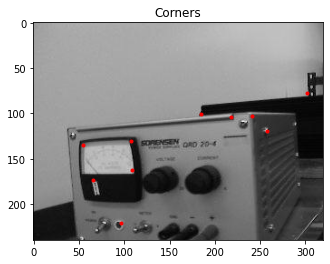

In [13]:
from skimage.feature import peak_local_max
 
# Find local maxima within each neighborhood N

coordinates = peak_local_max(s * s_thresh, min_distance=N)

plt.imshow(img, cmap='gray')
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.title('Corners')
plt.show()

### TODO

Use the OpenCV ``cv2.cornerHarris()`` function to detect corners on the above image and try it on an additional image. Read the documentation of the function and [here's an example](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

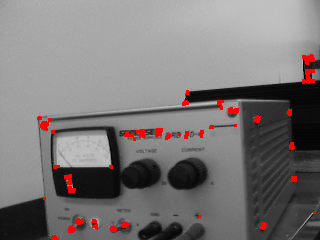

In [ ]:
# TODO

# Use the function cv2.cornerHarris to detect the corners in the image as shown below


# YOUR CODE HERE

cv2_imshow(output)



### Bonus

Detect corners on another version of the image and use a correlation approach to match the features between the two images as shown in the image below.

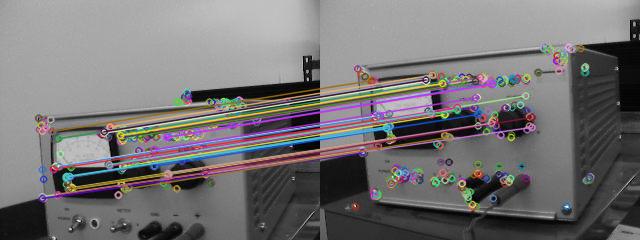

In [20]:
# Bonus

IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/test012.jpg'

urllib.request.urlretrieve(IMAGE_URL, 'test012.jpg')

img2 = cv2.imread('test012.jpg')

img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# YOUR CODE HERE

cv2_imshow(match_img)